# IMPORTS AND LOAD DATASET

In [1]:
#This are the most common imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
%matplotlib inline

In [2]:
SBH = pd.read_csv('serviciosbomberoshmo.csv', encoding="latin1")

In [3]:
sbh = SBH.copy()

In [4]:
sbh.head()

,FOLIO,TIPO,LUGAR,FECHA,SALIDA,LLEGADA,CAUSA,COLONIA,ESTACION
0,01012016-0007-INZB-2A,INCENDIO DE ZACATE Y BASURA,COMERCIO,01-01-16,01-01-16 0:07,01-01-16 0:16,FUEGO DIRECTO,SIN COLONIA,2.0
1,01012016-0022-INZB-1A,INCENDIO DE ZACATE Y BASURA,CASA,01-01-16,01-01-16 0:22,01-01-16 0:32,FUEGO DIRECTO,LOMAS DE MADRID,1.0
2,01012016-0029-IDCM-1A,INCENDIO DE CASA DE MATERIAL,CASA,01-01-16,01-01-16 0:29,01-01-16 0:43,OTROS,PUERTA REAL RESIDENCIAL,1.0
3,01012016-0039-INZB-2A,INCENDIO DE ZACATE Y BASURA,VEHICULO,01-01-16,01-01-16 0:39,01-01-16 0:43,FUEGO DIRECTO,NORBERTO ORTEGA,2.0
4,01012016-0051-INZB-2A,INCENDIO DE ZACATE Y BASURA,CASA,01-01-16,01-01-16 0:51,01-01-16 0:59,FUEGO DIRECTO,MIGUEL HIDALGO,2.0


In [5]:
sbh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22996 entries, 0 to 22995
Data columns (total 9 columns):
FOLIO       22996 non-null object
TIPO        22989 non-null object
LUGAR       22974 non-null object
FECHA       22996 non-null object
SALIDA      22996 non-null object
LLEGADA     22869 non-null object
CAUSA       22740 non-null object
COLONIA     22560 non-null object
ESTACION    22995 non-null float64
dtypes: float64(1), object(8)
memory usage: 1.6+ MB


In [6]:
#Hacer todas las letras del dataframe mayusculas
sbh = sbh.applymap(lambda s:s.upper() if type(s) == str else s)

In [0]:
#sbh_incendios = sbh[(sbh['TIPO'] ==12) & (sbh['TIPO']<=19)]

#Commando para saber si en un elemento del dataframe(df) de cierta columna(b) se encuentra la palabra x ('EQUITY')
#Regresa un valor falso o verdadero
#df['b'].str.contains(r'EQUITY')

# EJERCICIO 1. COLONIAS CON MAS INCENDIOS
 Colonia con más incendios

In [7]:
#Prueba de la funcion con dataframe de servicio de bomberos de Hermosillo
sbh['TIPO'].str.contains(r'INCENDIO').sum()

13466

In [8]:
#Reasigno la variable sbh_incendios en un nuevo dataframe que solo contenga los renglones donde el TIPO contenga la palabra incendio (ojo, la palabra puede estar en cualquier parte del string)
sbh_incendios = sbh[(sbh['TIPO'].str.contains(r'INCENDIO') == True)]

In [9]:
#Verificamos, originalmente todo los datos eran 22996 y ahora son 13466
sbh_incendios.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13466 entries, 0 to 22995
Data columns (total 9 columns):
FOLIO       13466 non-null object
TIPO        13466 non-null object
LUGAR       13457 non-null object
FECHA       13466 non-null object
SALIDA      13466 non-null object
LLEGADA     13398 non-null object
CAUSA       13398 non-null object
COLONIA     13200 non-null object
ESTACION    13465 non-null float64
dtypes: float64(1), object(8)
memory usage: 1.0+ MB


[Text(0, 0, 'CENTRO'),
 Text(0, 0, 'PARQUE INDUSTRIAL'),
 Text(0, 0, 'ALTARES'),
 Text(0, 0, 'SOLIDARIDAD'),
 Text(0, 0, 'NUEVO HERMOSILLO'),
 Text(0, 0, 'SAHUARO'),
 Text(0, 0, 'PROYECTO RIO SONORA'),
 Text(0, 0, 'CARRETERA A KINO'),
 Text(0, 0, '5 DE MAYO'),
 Text(0, 0, 'LAS LOMAS'),
 Text(0, 0, 'PALO VERDE'),
 Text(0, 0, 'LOS OLIVOS'),
 Text(0, 0, 'SAN BENITO'),
 Text(0, 0, 'SAN LUIS')]

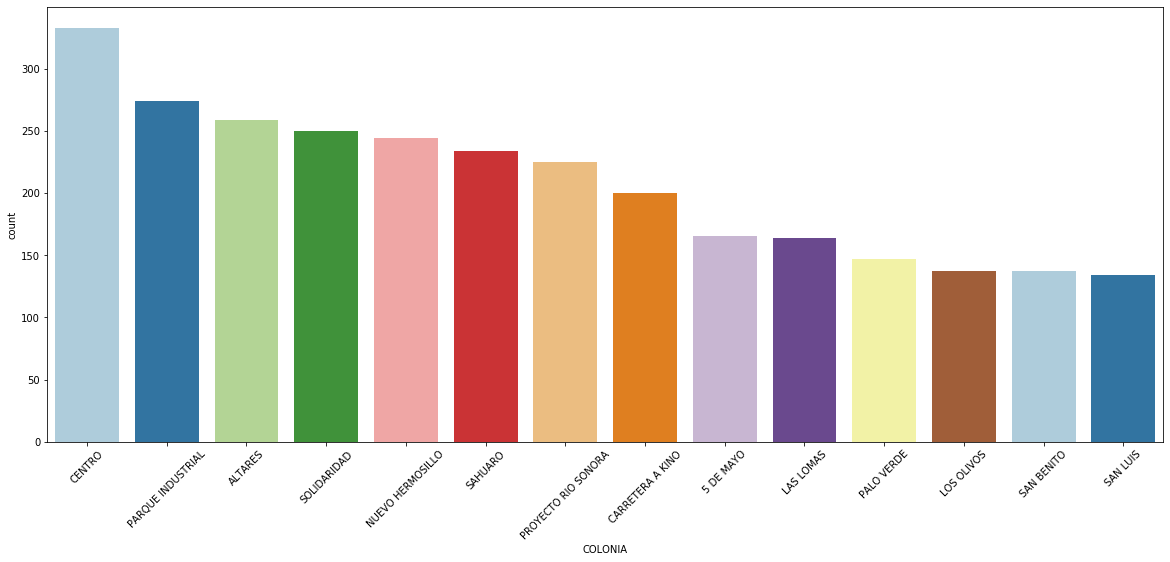

In [10]:
#Graficamos 
plt.figure(figsize=(20,8)) #Crea el espacio de memoria para la grafica y le asigna un tamaño en especifico

# La grafica se define como g solo para poderle asignar que las etiquetas en el eje x esten a 45 grados 
g = sns.countplot(x='COLONIA', data = sbh_incendios,order=pd.value_counts(sbh_incendios['COLONIA']).iloc[1:15].index, palette = 'Paired') 
loc, labels = plt.xticks()
g.set_xticklabels(labels, rotation=45)


# EJERCICIO 2 Top 10 Colonias Histograma por mes




In [11]:
#Obtenemos dia, mes y año de la columna de FECHA del dataframe
sbh_incendios['YEAR'] = pd.DatetimeIndex(sbh_incendios['FECHA']).year
sbh_incendios['MONTH'] = pd.DatetimeIndex(sbh_incendios['FECHA']).month
sbh_incendios['DAY'] = pd.DatetimeIndex(sbh_incendios['FECHA']).day

C:\Users\Daniel Ramirez\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Daniel Ramirez\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Daniel Ramirez\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [12]:
sbh_incendios.drop('FECHA', axis = 1).head()

,FOLIO,TIPO,LUGAR,SALIDA,LLEGADA,CAUSA,COLONIA,ESTACION,YEAR,MONTH,DAY
0,01012016-0007-INZB-2A,INCENDIO DE ZACATE Y BASURA,COMERCIO,01-01-16 0:07,01-01-16 0:16,FUEGO DIRECTO,SIN COLONIA,2.0,2016,1,1
1,01012016-0022-INZB-1A,INCENDIO DE ZACATE Y BASURA,CASA,01-01-16 0:22,01-01-16 0:32,FUEGO DIRECTO,LOMAS DE MADRID,1.0,2016,1,1
2,01012016-0029-IDCM-1A,INCENDIO DE CASA DE MATERIAL,CASA,01-01-16 0:29,01-01-16 0:43,OTROS,PUERTA REAL RESIDENCIAL,1.0,2016,1,1
3,01012016-0039-INZB-2A,INCENDIO DE ZACATE Y BASURA,VEHICULO,01-01-16 0:39,01-01-16 0:43,FUEGO DIRECTO,NORBERTO ORTEGA,2.0,2016,1,1
4,01012016-0051-INZB-2A,INCENDIO DE ZACATE Y BASURA,CASA,01-01-16 0:51,01-01-16 0:59,FUEGO DIRECTO,MIGUEL HIDALGO,2.0,2016,1,1


[Text(0, 0, 'CENTRO'),
 Text(0, 0, 'PARQUE INDUSTRIAL'),
 Text(0, 0, 'ALTARES'),
 Text(0, 0, 'SOLIDARIDAD'),
 Text(0, 0, 'NUEVO HERMOSILLO'),
 Text(0, 0, 'SAHUARO'),
 Text(0, 0, 'PROYECTO RIO SONORA'),
 Text(0, 0, 'CARRETERA A KINO'),
 Text(0, 0, '5 DE MAYO'),
 Text(0, 0, 'LAS LOMAS')]

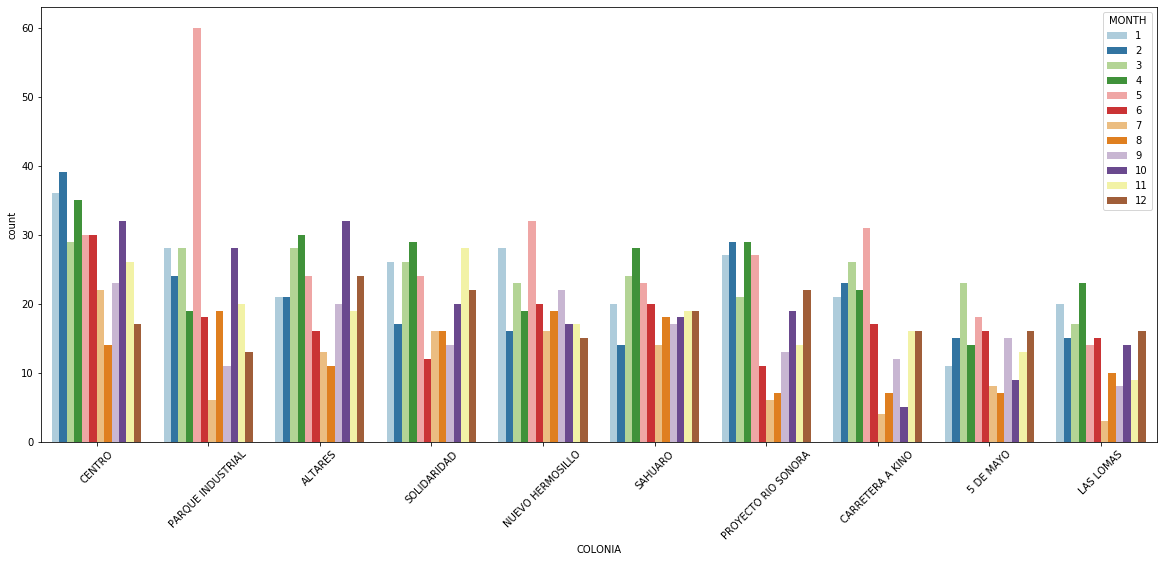

In [13]:
plt.figure(figsize=(20,8)) #Crea el espacio de memoria para la grafica y le asigna un tamaño en especifico

# La grafica se define como g solo para poderle asignar que las etiquetas en el eje x esten a 45 grados 
g1 = sns.countplot(x='COLONIA', data = sbh_incendios,order=pd.value_counts(sbh_incendios['COLONIA']).iloc[1:11].index, palette = 'Paired', hue= 'MONTH') 
loc, labels = plt.xticks()
g1.set_xticklabels(labels, rotation=45)

# EJERCICIO 3 INCENDIOS POR CAUSA

In [14]:
#Cuantas Causas hay
len(sbh_incendios['CAUSA'].unique())

32

[Text(0, 0, 'FUEGO DIRECTO'),
 Text(0, 0, 'CORTO CIRCUITO'),
 Text(0, 0, 'OTROS'),
 Text(0, 0, 'SOBRECALENTAMIENTO'),
 Text(0, 0, 'INCENDIO DE ZACATE Y BASURA'),
 Text(0, 0, 'FUGA DE COMBUSTIBLE'),
 Text(0, 0, 'SOBREPRESION'),
 Text(0, 0, 'FUGA DE GAS LP Y/O GAS NATURAL'),
 Text(0, 0, 'FUGA DE GAS'),
 Text(0, 0, 'SOBRECARGA')]

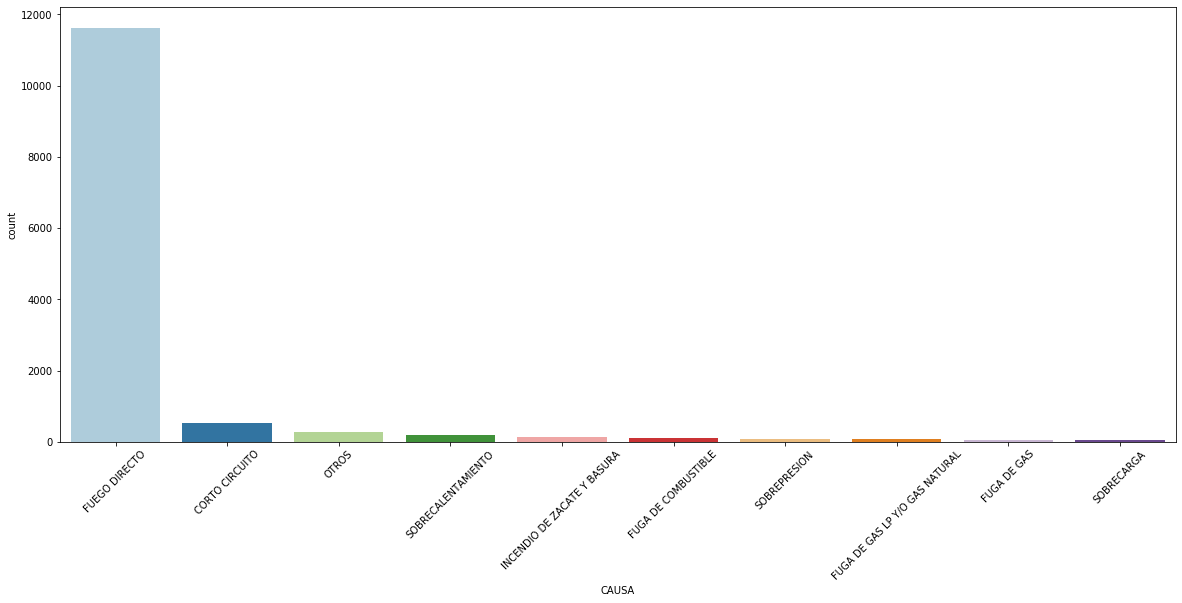

In [15]:
# En esta primera grafica se comparan las causas con todo el dataset de incendios
plt.figure(figsize=(20,8)) #Crea el espacio de memoria para la grafica y le asigna un tamaño en especifico

# La grafica se define como g solo para poderle asignar que las etiquetas en el eje x esten a 45 grados 
#g2 = sns.countplot(x='COLONIA', data = sbh_incendios,order=pd.value_counts(sbh_incendios['COLONIA']).iloc[1:11].index, palette = 'Paired', hue='CAUSA') 
g2 = sns.countplot(x='CAUSA', data = sbh_incendios, order = pd.value_counts(sbh_incendios['CAUSA']).iloc[:10].index, palette = 'Paired') 
loc, labels = plt.xticks()
g2.set_xticklabels(labels, rotation=45)

In [16]:
#Con este comando hago una variable tipo lista donde estan todas las causas a partir del index 7
#Es decir, .value_counts genera una dataframe ordenada de mayor a menor con todas las veces que un string se repite en la columna de CAUSA
sbh_incendios_causas_list = sbh_incendios['CAUSA'].value_counts().iloc[7:].index
sbh_incendios_causas_list

Index(['FUGA DE GAS LP Y/O GAS NATURAL', 'FUGA DE GAS', 'SOBRECARGA',
       'FALSA ALARMA', 'CHOQUE', 'ENJAMBRE DE ABEJAS',
       'INCENDIO DE CASA DE MATERIAL', 'MAL ESTADO DEL CILINDRO Y/O VALVULAS',
       'INCENDIO DE VEHÍCULO', 'CONATO DE INCENDIO', 'FALSA EXPLOSIÓN',
       'DERRAME DE COMBUSTIBLE', 'COBERTURA DE SEGURIDAD',
       'INCENDIO DE CASA DE CARTÓN', 'EXPLOSIONES', 'REMOJAR',
       'FENOMENO NATURAL', 'VOLCAMIENTO', 'INCENDIO DE COMERCIO',
       'INCENDIO DE INSTALACIÓN PÚBLICA', 'RETIRO DE ANIMAL',
       'INCIDENTE CON MATERIAL PELIGROSO', 'DERRUMBE', 'RESCATE'],
      dtype='object')

In [17]:
sbh_incendios_causas = sbh_incendios

In [18]:
sbh_causas = sbh_incendios['CAUSA'].value_counts()
sbh_causas

FUEGO DIRECTO                           11626
CORTO CIRCUITO                            523
OTROS                                     272
SOBRECALENTAMIENTO                        200
INCENDIO DE ZACATE Y BASURA               150
FUGA DE COMBUSTIBLE                       121
SOBREPRESION                               94
FUGA DE GAS LP Y/O GAS NATURAL             73
FUGA DE GAS                                61
SOBRECARGA                                 56
FALSA ALARMA                               50
CHOQUE                                     27
ENJAMBRE DE ABEJAS                         22
INCENDIO DE CASA DE MATERIAL               15
MAL ESTADO DEL CILINDRO Y/O VALVULAS       15
INCENDIO DE VEHÍCULO                       13
CONATO DE INCENDIO                         12
FALSA EXPLOSIÓN                            11
DERRAME DE COMBUSTIBLE                     11
COBERTURA DE SEGURIDAD                      8
INCENDIO DE CASA DE CARTÓN                  7
EXPLOSIONES                       

In [19]:
#Elimino tododos los elementos que anteriormente estableci en la variable sbh_incendios_causas_list, dejando solamente los primeros 7 con mayor cantidad de casos
sbh_incendios_causas = sbh_incendios_causas.drop(sbh_incendios_causas[sbh_incendios_causas['CAUSA'].isin(sbh_incendios_causas_list)].index)

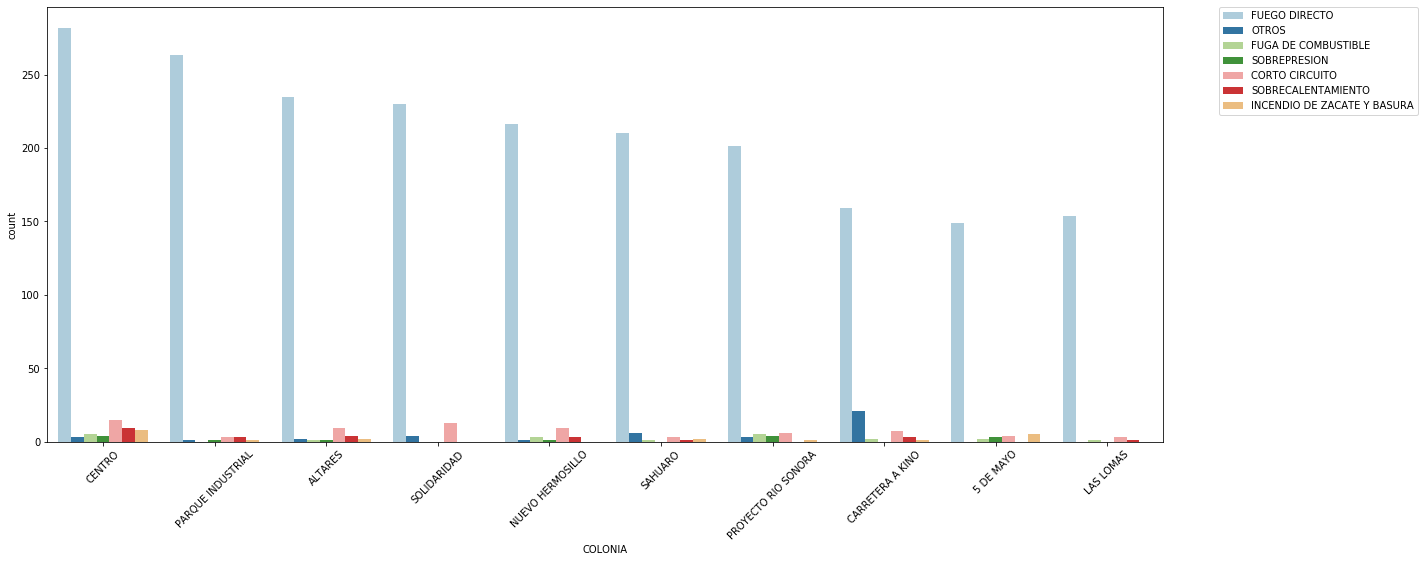

In [21]:
plt.figure(figsize=(20,8)) #Crea el espacio de memoria para la grafica y le asigna un tamaño en especifico

# La grafica se define como g solo para poderle asignar que las etiquetas en el eje x esten a 45 grados 
g2 = sns.countplot(x='COLONIA', data = sbh_incendios_causas,order=pd.value_counts(sbh_incendios_causas['COLONIA']).iloc[1:11].index, palette = 'Paired', hue='CAUSA') 
#g2 = sns.countplot(x='CAUSA', data = sbh_incendios, order = pd.value_counts(sbh_incendios['CAUSA']).iloc[:10].index, palette = 'Paired') 
loc, labels = plt.xticks()
g2.set_xticklabels(labels, rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# EJERCICIO 4 TIEMPO DE LLEGADA (SALIDA-LLEGADA)

In [22]:
#Verificacion de conversion de operacion artimetica de 2 conversiones de string a datetype
pd.to_datetime(sbh_incendios['LLEGADA'][0], dayfirst =True) - pd.to_datetime(sbh_incendios['SALIDA'][0], dayfirst =True)

Timedelta('0 days 00:09:00')

In [23]:
#Backup de dataset
sbh_incendios_tiempo = sbh_incendios

In [24]:
#Exploracion de datos
sbh_incendios_tiempo.head()

,FOLIO,TIPO,LUGAR,FECHA,SALIDA,LLEGADA,CAUSA,COLONIA,ESTACION,YEAR,MONTH,DAY
0,01012016-0007-INZB-2A,INCENDIO DE ZACATE Y BASURA,COMERCIO,01-01-16,01-01-16 0:07,01-01-16 0:16,FUEGO DIRECTO,SIN COLONIA,2.0,2016,1,1
1,01012016-0022-INZB-1A,INCENDIO DE ZACATE Y BASURA,CASA,01-01-16,01-01-16 0:22,01-01-16 0:32,FUEGO DIRECTO,LOMAS DE MADRID,1.0,2016,1,1
2,01012016-0029-IDCM-1A,INCENDIO DE CASA DE MATERIAL,CASA,01-01-16,01-01-16 0:29,01-01-16 0:43,OTROS,PUERTA REAL RESIDENCIAL,1.0,2016,1,1
3,01012016-0039-INZB-2A,INCENDIO DE ZACATE Y BASURA,VEHICULO,01-01-16,01-01-16 0:39,01-01-16 0:43,FUEGO DIRECTO,NORBERTO ORTEGA,2.0,2016,1,1
4,01012016-0051-INZB-2A,INCENDIO DE ZACATE Y BASURA,CASA,01-01-16,01-01-16 0:51,01-01-16 0:59,FUEGO DIRECTO,MIGUEL HIDALGO,2.0,2016,1,1


In [25]:
sbh_incendios_tiempo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13466 entries, 0 to 22995
Data columns (total 12 columns):
FOLIO       13466 non-null object
TIPO        13466 non-null object
LUGAR       13457 non-null object
FECHA       13466 non-null object
SALIDA      13466 non-null object
LLEGADA     13398 non-null object
CAUSA       13398 non-null object
COLONIA     13200 non-null object
ESTACION    13465 non-null float64
YEAR        13466 non-null int64
MONTH       13466 non-null int64
DAY         13466 non-null int64
dtypes: float64(1), int64(3), object(8)
memory usage: 2.0+ MB


In [26]:
#Agregar 2 columnas nuevas en base al experimento de las celdas ateriores, eliminacion de las dos celdas utilizadas
sbh_incendios_tiempo['SALIDADT'] = pd.to_datetime(sbh_incendios_tiempo['SALIDA'], dayfirst = True)
sbh_incendios_tiempo['LLEGADADT'] = pd.to_datetime(sbh_incendios_tiempo['LLEGADA'], dayfirst = True)
sbh_incendios_tiempo.drop(['SALIDA', 'LLEGADA'], axis = 1, inplace = True)

C:\Users\Daniel Ramirez\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Daniel Ramirez\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Daniel Ramirez\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pan

In [27]:
sbh_incendios_tiempo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13466 entries, 0 to 22995
Data columns (total 12 columns):
FOLIO        13466 non-null object
TIPO         13466 non-null object
LUGAR        13457 non-null object
FECHA        13466 non-null object
CAUSA        13398 non-null object
COLONIA      13200 non-null object
ESTACION     13465 non-null float64
YEAR         13466 non-null int64
MONTH        13466 non-null int64
DAY          13466 non-null int64
SALIDADT     13466 non-null datetime64[ns]
LLEGADADT    13398 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(3), object(6)
memory usage: 2.0+ MB


In [28]:
#int(sbh_incendios_tiempo['TIEMPO LLEGADA'].total_seconds() / 60)
sbh_incendios_tiempo['TIEMPO LLEGADA'] = pd.to_timedelta((sbh_incendios_tiempo['LLEGADADT'] - sbh_incendios['SALIDADT']))//(timedelta(minutes=1))

C:\Users\Daniel Ramirez\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [29]:
sbh_incendios_tiempo.head()

,FOLIO,TIPO,LUGAR,FECHA,CAUSA,COLONIA,ESTACION,YEAR,MONTH,DAY,SALIDADT,LLEGADADT,TIEMPO LLEGADA
0,01012016-0007-INZB-2A,INCENDIO DE ZACATE Y BASURA,COMERCIO,01-01-16,FUEGO DIRECTO,SIN COLONIA,2.0,2016,1,1,2016-01-01 00:07:00,2016-01-01 00:16:00,9.0
1,01012016-0022-INZB-1A,INCENDIO DE ZACATE Y BASURA,CASA,01-01-16,FUEGO DIRECTO,LOMAS DE MADRID,1.0,2016,1,1,2016-01-01 00:22:00,2016-01-01 00:32:00,10.0
2,01012016-0029-IDCM-1A,INCENDIO DE CASA DE MATERIAL,CASA,01-01-16,OTROS,PUERTA REAL RESIDENCIAL,1.0,2016,1,1,2016-01-01 00:29:00,2016-01-01 00:43:00,14.0
3,01012016-0039-INZB-2A,INCENDIO DE ZACATE Y BASURA,VEHICULO,01-01-16,FUEGO DIRECTO,NORBERTO ORTEGA,2.0,2016,1,1,2016-01-01 00:39:00,2016-01-01 00:43:00,4.0
4,01012016-0051-INZB-2A,INCENDIO DE ZACATE Y BASURA,CASA,01-01-16,FUEGO DIRECTO,MIGUEL HIDALGO,2.0,2016,1,1,2016-01-01 00:51:00,2016-01-01 00:59:00,8.0


In [30]:
sbh_incendios_tiempo['TIEMPO LLEGADA'].value_counts().iloc[:10]

7.0     1305
6.0     1279
5.0     1261
8.0     1215
9.0     1041
10.0    1001
4.0      931
11.0     756
3.0      665
12.0     630
Name: TIEMPO LLEGADA, dtype: int64

In [31]:
#Fijar valores de tiempos para poderlos graficar como hue

sbh_incendios_tiempo1 = sbh_incendios_tiempo.drop(sbh_incendios_tiempo[sbh_incendios_tiempo['TIEMPO LLEGADA'] <0].index)
sbh_incendios_tiempo1 = sbh_incendios_tiempo1.drop(sbh_incendios_tiempo1[sbh_incendios_tiempo1['TIEMPO LLEGADA'] >= 12].index)

In [32]:
sbh_incendios_tiempo1.head()

,FOLIO,TIPO,LUGAR,FECHA,CAUSA,COLONIA,ESTACION,YEAR,MONTH,DAY,SALIDADT,LLEGADADT,TIEMPO LLEGADA
0,01012016-0007-INZB-2A,INCENDIO DE ZACATE Y BASURA,COMERCIO,01-01-16,FUEGO DIRECTO,SIN COLONIA,2.0,2016,1,1,2016-01-01 00:07:00,2016-01-01 00:16:00,9.0
1,01012016-0022-INZB-1A,INCENDIO DE ZACATE Y BASURA,CASA,01-01-16,FUEGO DIRECTO,LOMAS DE MADRID,1.0,2016,1,1,2016-01-01 00:22:00,2016-01-01 00:32:00,10.0
3,01012016-0039-INZB-2A,INCENDIO DE ZACATE Y BASURA,VEHICULO,01-01-16,FUEGO DIRECTO,NORBERTO ORTEGA,2.0,2016,1,1,2016-01-01 00:39:00,2016-01-01 00:43:00,4.0
4,01012016-0051-INZB-2A,INCENDIO DE ZACATE Y BASURA,CASA,01-01-16,FUEGO DIRECTO,MIGUEL HIDALGO,2.0,2016,1,1,2016-01-01 00:51:00,2016-01-01 00:59:00,8.0
5,01012016-0053-IDCM-1A,INCENDIO DE CASA DE MATERIAL,CASA,01-01-16,FUEGO DIRECTO,SANTA FE,1.0,2016,1,1,2016-01-01 00:53:00,2016-01-01 00:58:00,5.0


In [33]:
type(sbh_incendios_tiempo1['TIEMPO LLEGADA'][0])

numpy.float64

[Text(0, 0, 'CENTRO'),
 Text(0, 0, 'SIN COLONIA'),
 Text(0, 0, 'SOLIDARIDAD'),
 Text(0, 0, 'NUEVO HERMOSILLO'),
 Text(0, 0, 'PARQUE INDUSTRIAL'),
 Text(0, 0, 'ALTARES'),
 Text(0, 0, 'SAHUARO'),
 Text(0, 0, '5 DE MAYO'),
 Text(0, 0, 'PROYECTO RIO SONORA'),
 Text(0, 0, 'SAN BENITO'),
 Text(0, 0, 'LAS LOMAS')]

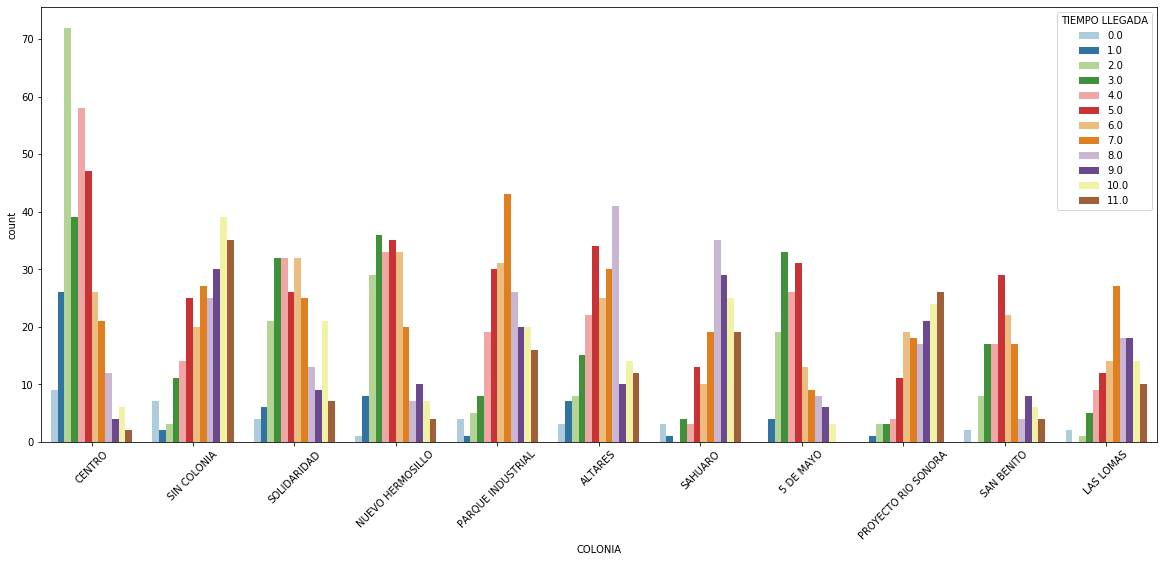

In [34]:
plt.figure(figsize=(20,8)) #Crea el espacio de memoria para la grafica y le asigna un tamaño en especifico

# La grafica se define como g solo para poderle asignar que las etiquetas en el eje x esten a 45 grados 
g4 = sns.countplot(x='COLONIA', data = sbh_incendios_tiempo1,order=pd.value_counts(sbh_incendios_tiempo1['COLONIA']).iloc[0:11].index, palette = 'Paired', hue= 'TIEMPO LLEGADA') 
loc, labels = plt.xticks()
g4.set_xticklabels(labels, rotation=45)

# EJERCICIO 5 % DE LLAMADAS DE FALSA ALARMA

De las 15 colonias con mas incendios cuantas llamadas fueron falsas



In [35]:
#Comprobación que en la columna de causas contiene la palabra FALSA ALARMA
sbh_incendios['CAUSA'].str.contains(r'FALSA ALARMA').sum()

50

In [36]:
#Hago un nuevo DATAFRAME solamente para este ejercicio donde agrego una nueva columna que se agregara 0 o 1 si cumple la condicion
#Recordemos que esa funcion regresa FALSE o TRUE
#Agregue una nueva columna para poderla usar como HUE en la grafica
sbh_incendios_falsa_alarma = sbh_incendios
sbh_incendios_falsa_alarma['Falsa Alarma'] =sbh_incendios_falsa_alarma['CAUSA'].str.contains(r'FALSA ALARMA')
 

C:\Users\Daniel Ramirez\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [37]:
sbh_incendios_falsa_alarma.head()

,FOLIO,TIPO,LUGAR,FECHA,CAUSA,COLONIA,ESTACION,YEAR,MONTH,DAY,SALIDADT,LLEGADADT,TIEMPO LLEGADA,Falsa Alarma
0,01012016-0007-INZB-2A,INCENDIO DE ZACATE Y BASURA,COMERCIO,01-01-16,FUEGO DIRECTO,SIN COLONIA,2.0,2016,1,1,2016-01-01 00:07:00,2016-01-01 00:16:00,9.0,False
1,01012016-0022-INZB-1A,INCENDIO DE ZACATE Y BASURA,CASA,01-01-16,FUEGO DIRECTO,LOMAS DE MADRID,1.0,2016,1,1,2016-01-01 00:22:00,2016-01-01 00:32:00,10.0,False
2,01012016-0029-IDCM-1A,INCENDIO DE CASA DE MATERIAL,CASA,01-01-16,OTROS,PUERTA REAL RESIDENCIAL,1.0,2016,1,1,2016-01-01 00:29:00,2016-01-01 00:43:00,14.0,False
3,01012016-0039-INZB-2A,INCENDIO DE ZACATE Y BASURA,VEHICULO,01-01-16,FUEGO DIRECTO,NORBERTO ORTEGA,2.0,2016,1,1,2016-01-01 00:39:00,2016-01-01 00:43:00,4.0,False
4,01012016-0051-INZB-2A,INCENDIO DE ZACATE Y BASURA,CASA,01-01-16,FUEGO DIRECTO,MIGUEL HIDALGO,2.0,2016,1,1,2016-01-01 00:51:00,2016-01-01 00:59:00,8.0,False


In [38]:
sbh_incendios_falsa_alarma.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13466 entries, 0 to 22995
Data columns (total 14 columns):
FOLIO             13466 non-null object
TIPO              13466 non-null object
LUGAR             13457 non-null object
FECHA             13466 non-null object
CAUSA             13398 non-null object
COLONIA           13200 non-null object
ESTACION          13465 non-null float64
YEAR              13466 non-null int64
MONTH             13466 non-null int64
DAY               13466 non-null int64
SALIDADT          13466 non-null datetime64[ns]
LLEGADADT         13398 non-null datetime64[ns]
TIEMPO LLEGADA    13398 non-null float64
Falsa Alarma      13398 non-null object
dtypes: datetime64[ns](2), float64(2), int64(3), object(7)
memory usage: 2.2+ MB


[Text(0, 0, 'CENTRO'),
 Text(0, 0, 'PARQUE INDUSTRIAL'),
 Text(0, 0, 'ALTARES'),
 Text(0, 0, 'SOLIDARIDAD'),
 Text(0, 0, 'NUEVO HERMOSILLO'),
 Text(0, 0, 'SAHUARO'),
 Text(0, 0, 'PROYECTO RIO SONORA'),
 Text(0, 0, 'CARRETERA A KINO'),
 Text(0, 0, '5 DE MAYO'),
 Text(0, 0, 'LAS LOMAS'),
 Text(0, 0, 'PALO VERDE'),
 Text(0, 0, 'LOS OLIVOS'),
 Text(0, 0, 'SAN BENITO'),
 Text(0, 0, 'SAN LUIS')]

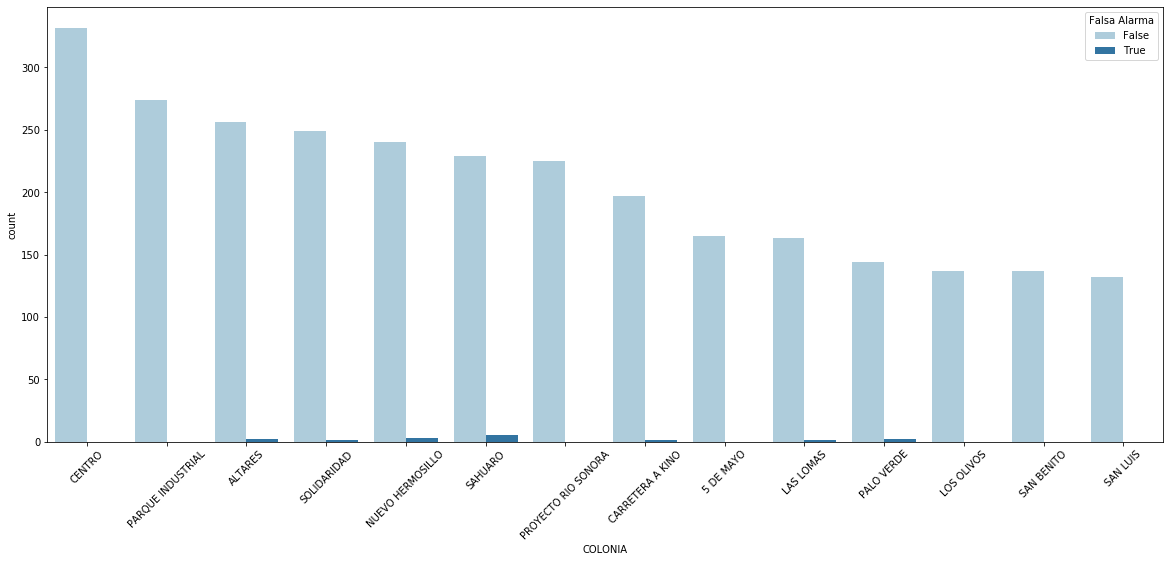

In [39]:
#Graficamos 
plt.figure(figsize=(20,8)) #Crea el espacio de memoria para la grafica y le asigna un tamaño en especifico

# La grafica se define como g solo para poderle asignar que las etiquetas en el eje x esten a 45 grados 
g5 = sns.countplot(x='COLONIA', data = sbh_incendios,order=pd.value_counts(sbh_incendios['COLONIA']).iloc[1:15].index, palette = 'Paired', hue = 'Falsa Alarma') 
loc, labels = plt.xticks()
g5.set_xticklabels(labels, rotation=45)

In [40]:
#(Numero de llamadas Falsas / Total de llamadas) *100
Porcentaje_Falsas_Alarmas = (sbh_incendios_falsa_alarma['Falsa Alarma'].sum()/len(sbh_incendios_falsa_alarma['Falsa Alarma']))*100
Porcentaje_Falsas_Alarmas

0.37130551017377095

In [41]:
SBH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22996 entries, 0 to 22995
Data columns (total 9 columns):
FOLIO       22996 non-null object
TIPO        22989 non-null object
LUGAR       22974 non-null object
FECHA       22996 non-null object
SALIDA      22996 non-null object
LLEGADA     22869 non-null object
CAUSA       22740 non-null object
COLONIA     22560 non-null object
ESTACION    22995 non-null float64
dtypes: float64(1), object(8)
memory usage: 1.6+ MB


In [42]:
(SBH['TIPO']=='FALSA ALARMA').sum()

1393

In [43]:
((SBH['TIPO']=='FALSA ALARMA').sum()/len(SBH))*100

6.057575230474866

# EJERCICIO 6 % DE INCENDIOS DE MALESA
Si analizamos un poco el dataset podemos ver que en las columas de TIPO y CAUSA hay strings de INCENDIO DE ZACATE y BASURA,
en este caso tomaremos la columna de TIPO

In [44]:
sbh_incendios['CAUSA'].value_counts()

FUEGO DIRECTO                           11626
CORTO CIRCUITO                            523
OTROS                                     272
SOBRECALENTAMIENTO                        200
INCENDIO DE ZACATE Y BASURA               150
FUGA DE COMBUSTIBLE                       121
SOBREPRESION                               94
FUGA DE GAS LP Y/O GAS NATURAL             73
FUGA DE GAS                                61
SOBRECARGA                                 56
FALSA ALARMA                               50
CHOQUE                                     27
ENJAMBRE DE ABEJAS                         22
INCENDIO DE CASA DE MATERIAL               15
MAL ESTADO DEL CILINDRO Y/O VALVULAS       15
INCENDIO DE VEHÍCULO                       13
CONATO DE INCENDIO                         12
FALSA EXPLOSIÓN                            11
DERRAME DE COMBUSTIBLE                     11
COBERTURA DE SEGURIDAD                      8
INCENDIO DE CASA DE CARTÓN                  7
EXPLOSIONES                       

In [45]:
#Comprobación que en la columna de causas contiene la palabra INCENDIO DE ZACATE Y BASURA
sbh_incendios['CAUSA'].str.contains(r'INCENDIO DE ZACATE Y BASURA').sum()

150

In [46]:
#El string MALEZA no viene en el dataset, lo tomares como INCENDIO DE ZACATE Y BASURA 
sbh_incendios['TIPO'].value_counts()

INCENDIO DE ZACATE Y BASURA        9434
INCENDIO DE CASA DE MATERIAL       1926
INCENDIO DE VEHÍCULO               1059
INCENDIO DE CASA DE CARTÓN          450
INCENDIO DE COMERCIO                322
INCENDIO DE INSTALACIÓN PÚBLICA     135
CONATO DE INCENDIO                   76
INCENDIO DE INDUSTRIA                34
INCENDIO DE ALMACEN                  30
Name: TIPO, dtype: int64

In [47]:
#Comprobación que en la columna de causas contiene la palabra INCENDIO DE ZACATE Y BASURA
sbh_incendios['TIPO'].str.contains(r'INCENDIO DE ZACATE Y BASURA').sum()

9434

In [49]:
#Hago un nuevo DATAFRAME solamente para este ejercicio donde agrego una nueva columna que se agregara 0 o 1 si cumple la condicion
#Recordemos que esa funcion regresa FALSE o TRUE
#Agregue una nueva columna para poderla usar como HUE en la grafica
sbh_incendios_maleza = sbh_incendios
sbh_incendios_maleza['Maleza'] =sbh_incendios_maleza['TIPO'].str.contains(r'INCENDIO DE ZACATE Y BASURA')

C:\Users\Daniel Ramirez\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [50]:
sbh_incendios_maleza.head()

,FOLIO,TIPO,LUGAR,FECHA,CAUSA,COLONIA,ESTACION,YEAR,MONTH,DAY,SALIDADT,LLEGADADT,TIEMPO LLEGADA,Falsa Alarma,Maleza
0,01012016-0007-INZB-2A,INCENDIO DE ZACATE Y BASURA,COMERCIO,01-01-16,FUEGO DIRECTO,SIN COLONIA,2.0,2016,1,1,2016-01-01 00:07:00,2016-01-01 00:16:00,9.0,False,True
1,01012016-0022-INZB-1A,INCENDIO DE ZACATE Y BASURA,CASA,01-01-16,FUEGO DIRECTO,LOMAS DE MADRID,1.0,2016,1,1,2016-01-01 00:22:00,2016-01-01 00:32:00,10.0,False,True
2,01012016-0029-IDCM-1A,INCENDIO DE CASA DE MATERIAL,CASA,01-01-16,OTROS,PUERTA REAL RESIDENCIAL,1.0,2016,1,1,2016-01-01 00:29:00,2016-01-01 00:43:00,14.0,False,False
3,01012016-0039-INZB-2A,INCENDIO DE ZACATE Y BASURA,VEHICULO,01-01-16,FUEGO DIRECTO,NORBERTO ORTEGA,2.0,2016,1,1,2016-01-01 00:39:00,2016-01-01 00:43:00,4.0,False,True
4,01012016-0051-INZB-2A,INCENDIO DE ZACATE Y BASURA,CASA,01-01-16,FUEGO DIRECTO,MIGUEL HIDALGO,2.0,2016,1,1,2016-01-01 00:51:00,2016-01-01 00:59:00,8.0,False,True


In [51]:
sbh_incendios_maleza.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13466 entries, 0 to 22995
Data columns (total 15 columns):
FOLIO             13466 non-null object
TIPO              13466 non-null object
LUGAR             13457 non-null object
FECHA             13466 non-null object
CAUSA             13398 non-null object
COLONIA           13200 non-null object
ESTACION          13465 non-null float64
YEAR              13466 non-null int64
MONTH             13466 non-null int64
DAY               13466 non-null int64
SALIDADT          13466 non-null datetime64[ns]
LLEGADADT         13398 non-null datetime64[ns]
TIEMPO LLEGADA    13398 non-null float64
Falsa Alarma      13398 non-null object
Maleza            13466 non-null bool
dtypes: bool(1), datetime64[ns](2), float64(2), int64(3), object(7)
memory usage: 2.2+ MB


[Text(0, 0, 'CENTRO'),
 Text(0, 0, 'PARQUE INDUSTRIAL'),
 Text(0, 0, 'ALTARES'),
 Text(0, 0, 'SOLIDARIDAD'),
 Text(0, 0, 'NUEVO HERMOSILLO'),
 Text(0, 0, 'SAHUARO'),
 Text(0, 0, 'PROYECTO RIO SONORA'),
 Text(0, 0, 'CARRETERA A KINO'),
 Text(0, 0, '5 DE MAYO'),
 Text(0, 0, 'LAS LOMAS'),
 Text(0, 0, 'PALO VERDE'),
 Text(0, 0, 'LOS OLIVOS'),
 Text(0, 0, 'SAN BENITO'),
 Text(0, 0, 'SAN LUIS')]

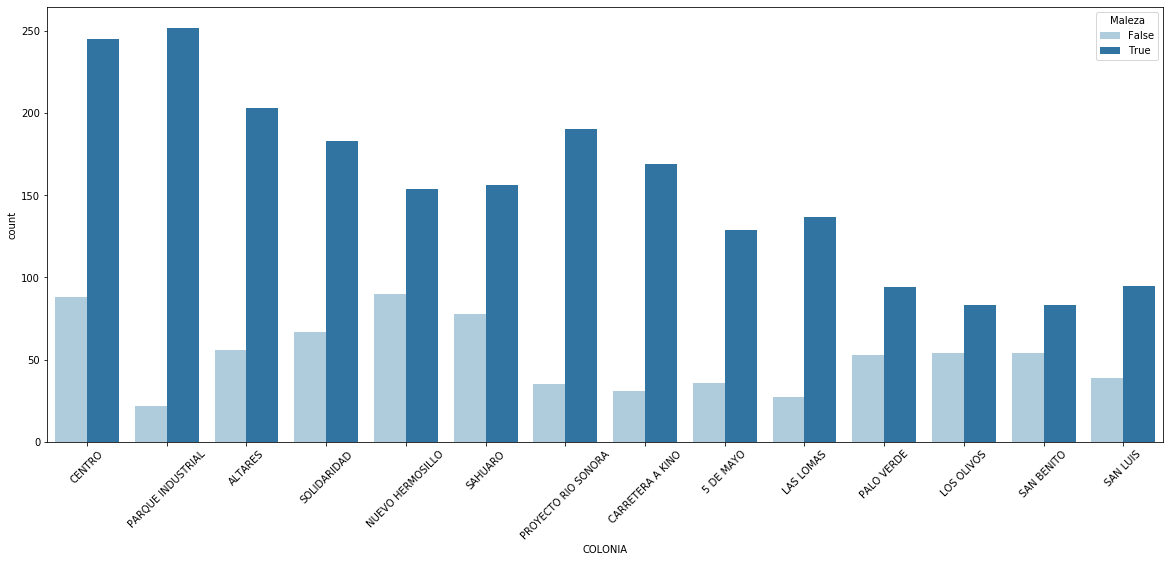

In [52]:
#Graficamos 
plt.figure(figsize=(20,8)) #Crea el espacio de memoria para la grafica y le asigna un tamaño en especifico

# La grafica se define como g solo para poderle asignar que las etiquetas en el eje x esten a 45 grados 
g6 = sns.countplot(x='COLONIA', data = sbh_incendios,order=pd.value_counts(sbh_incendios['COLONIA']).iloc[1:15].index, palette = 'Paired', hue = 'Maleza') 
loc, labels = plt.xticks()
g6.set_xticklabels(labels, rotation=45)

In [53]:
Porcentaje_Maleza = (sbh_incendios_maleza['Maleza'].sum()/len(sbh_incendios_maleza['TIPO']))*100
Porcentaje_Maleza

70.0579236595871

In [54]:
SBH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22996 entries, 0 to 22995
Data columns (total 9 columns):
FOLIO       22996 non-null object
TIPO        22989 non-null object
LUGAR       22974 non-null object
FECHA       22996 non-null object
SALIDA      22996 non-null object
LLEGADA     22869 non-null object
CAUSA       22740 non-null object
COLONIA     22560 non-null object
ESTACION    22995 non-null float64
dtypes: float64(1), object(8)
memory usage: 1.6+ MB


In [55]:
SBH

,FOLIO,TIPO,LUGAR,FECHA,SALIDA,LLEGADA,CAUSA,COLONIA,ESTACION
0,01012016-0007-INZB-2A,INCENDIO DE ZACATE Y BASURA,COMERCIO,01-01-16,01-01-16 0:07,01-01-16 0:16,FUEGO DIRECTO,SIN COLONIA,2.0
1,01012016-0022-INZB-1A,INCENDIO DE ZACATE Y BASURA,CASA,01-01-16,01-01-16 0:22,01-01-16 0:32,FUEGO DIRECTO,LOMAS DE MADRID,1.0
2,01012016-0029-IDCM-1A,INCENDIO DE CASA DE MATERIAL,CASA,01-01-16,01-01-16 0:29,01-01-16 0:43,OTROS,PUERTA REAL RESIDENCIAL,1.0
3,01012016-0039-INZB-2A,INCENDIO DE ZACATE Y BASURA,VEHICULO,01-01-16,01-01-16 0:39,01-01-16 0:43,FUEGO DIRECTO,NORBERTO ORTEGA,2.0
4,01012016-0051-INZB-2A,INCENDIO DE ZACATE Y BASURA,CASA,01-01-16,01-01-16 0:51,01-01-16 0:59,FUEGO DIRECTO,MIGUEL HIDALGO,2.0
5,01012016-0053-IDCM-1A,INCENDIO DE CASA DE MATERIAL,CASA,01-01-16,01-01-16 0:53,01-01-16 0:58,FUEGO DIRECTO,SANTA FE,1.0
6,01012016-0058-INZB-1A,INCENDIO DE ZACATE Y BASURA,LOTE BALDIO,01-01-16,01-01-16 0:58,01-01-16 1:14,FUEGO DIRECTO,TULIPANES,1.0
7,01012016-0115-IDCM-2A,INCENDIO DE CASA DE MATERIAL,CASA,01-01-16,01-01-16 1:15,01-01-16 1:21,FUEGO DIRECTO,VILLAS DEL PALMAR,2.0
8,01012016-0247-RANI-1A,RETIRO DE ANIMAL,CASA,01-01-16,01-01-16 2:47,01-01-16 2:59,RETIRO DE ANIMAL,LAS GRANJAS,1.0
9,01012016-0415-INZB-3A,INCENDIO DE ZACATE Y BASURA,LOTE BALDIO,01-01-16,01-01-16 4:13,01-01-16 4:22,FUEGO DIRECTO,URBI VILLA DEL REY SECCION LOS MANZANOS II,3.0


# RANDOM FOREST

## Imports and data cleaning

In [56]:
#This are the most common imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
%matplotlib inline

In [57]:
#This is for splitting the train data vs the test data
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 101)

# This is for Logistic Regression
from sklearn.linear_model import LogisticRegression

#This is for Linear Regression
from sklearn.linear_model import LinearRegression

#This is a import for classification_report, it will show the accuracy of the training model
from sklearn.metrics import classification_report, confusion_matrix

#This is a import for Random Forest
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#Steps to predict 
from sklearn.ensemble import RandomForestRegressor
from IPython.display import display


In [59]:
SBH_F = pd.read_csv('serviciobomberos16-18.csv', encoding="latin1", parse_dates=['FECHA', 'SALIDA', 'LLEGADA'])

In [60]:
SBH_F = SBH_F.applymap(lambda s:s.upper() if type(s) == str else s)

In [61]:
SBH_F.head()

,Unnamed: 0,TIPO,LUGAR,FECHA,SALIDA,LLEGADA,CAUSA,COLONIA,ESTACION,TIEMPO TRANSCURRIDO,MES,DIA DE SEMANA
0,0,INCENDIO DE ZACATE Y BASURA,COMERCIO,2016-01-01,2016-01-01 00:07:00,2016-01-01 00:16:00,FUEGO DIRECTO,SIN COLONIA,2.0,9.0,1,VIE
1,1,INCENDIO DE ZACATE Y BASURA,CASA,2016-01-01,2016-01-01 00:22:00,2016-01-01 00:32:00,FUEGO DIRECTO,LOMAS DE MADRID,1.0,10.0,1,VIE
2,2,INCENDIO DE CASA DE MATERIAL,CASA,2016-01-01,2016-01-01 00:29:00,2016-01-01 00:43:00,OTROS,PUERTA REAL RESIDENCIAL,1.0,14.0,1,VIE
3,3,INCENDIO DE ZACATE Y BASURA,VEHICULO,2016-01-01,2016-01-01 00:39:00,2016-01-01 00:43:00,FUEGO DIRECTO,NORBERTO ORTEGA,2.0,4.0,1,VIE
4,4,INCENDIO DE ZACATE Y BASURA,CASA,2016-01-01,2016-01-01 00:51:00,2016-01-01 00:59:00,FUEGO DIRECTO,MIGUEL HIDALGO,2.0,8.0,1,VIE


In [62]:
SBH_F.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18946 entries, 0 to 18945
Data columns (total 12 columns):
Unnamed: 0             18946 non-null int64
TIPO                   18939 non-null object
LUGAR                  18946 non-null object
FECHA                  18946 non-null datetime64[ns]
SALIDA                 18946 non-null datetime64[ns]
LLEGADA                18844 non-null datetime64[ns]
CAUSA                  18709 non-null object
COLONIA                18578 non-null object
ESTACION               18946 non-null float64
TIEMPO TRANSCURRIDO    18844 non-null float64
MES                    18946 non-null int64
DIA DE SEMANA          18946 non-null object
dtypes: datetime64[ns](3), float64(2), int64(2), object(5)
memory usage: 1.7+ MB


In [63]:
SBH_F.drop('Unnamed: 0', axis = 1, inplace= True)

Cleaning the data

In [64]:
SBH_F.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18946 entries, 0 to 18945
Data columns (total 11 columns):
TIPO                   18939 non-null object
LUGAR                  18946 non-null object
FECHA                  18946 non-null datetime64[ns]
SALIDA                 18946 non-null datetime64[ns]
LLEGADA                18844 non-null datetime64[ns]
CAUSA                  18709 non-null object
COLONIA                18578 non-null object
ESTACION               18946 non-null float64
TIEMPO TRANSCURRIDO    18844 non-null float64
MES                    18946 non-null int64
DIA DE SEMANA          18946 non-null object
dtypes: datetime64[ns](3), float64(2), int64(1), object(5)
memory usage: 1.6+ MB


Delete the negative time in the column TIEMPO TRANSCURRIDO

In [65]:
SBH_F= SBH_F[(SBH_F['TIEMPO TRANSCURRIDO']) >0 & (SBH_F['TIEMPO TRANSCURRIDO'] < 120)]
SBH_F.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18545 entries, 0 to 18945
Data columns (total 11 columns):
TIPO                   18538 non-null object
LUGAR                  18545 non-null object
FECHA                  18545 non-null datetime64[ns]
SALIDA                 18545 non-null datetime64[ns]
LLEGADA                18545 non-null datetime64[ns]
CAUSA                  18321 non-null object
COLONIA                18197 non-null object
ESTACION               18545 non-null float64
TIEMPO TRANSCURRIDO    18545 non-null float64
MES                    18545 non-null int64
DIA DE SEMANA          18545 non-null object
dtypes: datetime64[ns](3), float64(2), int64(1), object(5)
memory usage: 1.7+ MB


Check how many columns are empty

In [66]:
SBH_F.isna().sum()

TIPO                     7
LUGAR                    0
FECHA                    0
SALIDA                   0
LLEGADA                  0
CAUSA                  224
COLONIA                348
ESTACION                 0
TIEMPO TRANSCURRIDO      0
MES                      0
DIA DE SEMANA            0
dtype: int64

Filling empty data

In [67]:
SBH_F['TIPO'].fillna('OTROS', inplace=True)
SBH_F['LUGAR'].replace('-','OTROS',inplace=True)
SBH_F['LUGAR'].replace('ENDA','OTROS',inplace=True)
SBH_F['LUGAR'].fillna('OTROS', inplace=True)
SBH_F['CAUSA'].fillna('OTROS', inplace=True)
SBH_F['COLONIA'].fillna('SIN COLONIA', inplace=True)

Check if it worked

In [68]:
SBH_F.isna().sum()

TIPO                   0
LUGAR                  0
FECHA                  0
SALIDA                 0
LLEGADA                0
CAUSA                  0
COLONIA                0
ESTACION               0
TIEMPO TRANSCURRIDO    0
MES                    0
DIA DE SEMANA          0
dtype: int64

Convert the column LUGAR to numbers

In [69]:
SBH_F['LUGAR'] = pd.factorize(SBH_F['LUGAR'], sort=True)[0] + 1

In [70]:
SBH_F.head()

,TIPO,LUGAR,FECHA,SALIDA,LLEGADA,CAUSA,COLONIA,ESTACION,TIEMPO TRANSCURRIDO,MES,DIA DE SEMANA
0,INCENDIO DE ZACATE Y BASURA,5,2016-01-01,2016-01-01 00:07:00,2016-01-01 00:16:00,FUEGO DIRECTO,SIN COLONIA,2.0,9.0,1,VIE
1,INCENDIO DE ZACATE Y BASURA,4,2016-01-01,2016-01-01 00:22:00,2016-01-01 00:32:00,FUEGO DIRECTO,LOMAS DE MADRID,1.0,10.0,1,VIE
2,INCENDIO DE CASA DE MATERIAL,4,2016-01-01,2016-01-01 00:29:00,2016-01-01 00:43:00,OTROS,PUERTA REAL RESIDENCIAL,1.0,14.0,1,VIE
3,INCENDIO DE ZACATE Y BASURA,11,2016-01-01,2016-01-01 00:39:00,2016-01-01 00:43:00,FUEGO DIRECTO,NORBERTO ORTEGA,2.0,4.0,1,VIE
4,INCENDIO DE ZACATE Y BASURA,4,2016-01-01,2016-01-01 00:51:00,2016-01-01 00:59:00,FUEGO DIRECTO,MIGUEL HIDALGO,2.0,8.0,1,VIE


Convert the column CAUSA to numbers

In [71]:
SBH_F['CAUSA'] = pd.factorize(SBH_F['CAUSA'], sort=True)[0] + 1

Convert the column COLONIA to numbers

In [72]:
SBH_F['COLONIA'] = pd.factorize(SBH_F['COLONIA'], sort=True)[0] + 1

Drop the column Dia de Semana

In [73]:
SBH_F.drop(['MES', 'DIA DE SEMANA'], axis = 1, inplace= True)
SBH_F.head()

,TIPO,LUGAR,FECHA,SALIDA,LLEGADA,CAUSA,COLONIA,ESTACION,TIEMPO TRANSCURRIDO
0,INCENDIO DE ZACATE Y BASURA,5,2016-01-01,2016-01-01 00:07:00,2016-01-01 00:16:00,23,563,2.0,9.0
1,INCENDIO DE ZACATE Y BASURA,4,2016-01-01,2016-01-01 00:22:00,2016-01-01 00:32:00,23,316,1.0,10.0
2,INCENDIO DE CASA DE MATERIAL,4,2016-01-01,2016-01-01 00:29:00,2016-01-01 00:43:00,39,477,1.0,14.0
3,INCENDIO DE ZACATE Y BASURA,11,2016-01-01,2016-01-01 00:39:00,2016-01-01 00:43:00,23,366,2.0,4.0
4,INCENDIO DE ZACATE Y BASURA,4,2016-01-01,2016-01-01 00:51:00,2016-01-01 00:59:00,23,350,2.0,8.0


In [74]:
SBH_F.head()

,TIPO,LUGAR,FECHA,SALIDA,LLEGADA,CAUSA,COLONIA,ESTACION,TIEMPO TRANSCURRIDO
0,INCENDIO DE ZACATE Y BASURA,5,2016-01-01,2016-01-01 00:07:00,2016-01-01 00:16:00,23,563,2.0,9.0
1,INCENDIO DE ZACATE Y BASURA,4,2016-01-01,2016-01-01 00:22:00,2016-01-01 00:32:00,23,316,1.0,10.0
2,INCENDIO DE CASA DE MATERIAL,4,2016-01-01,2016-01-01 00:29:00,2016-01-01 00:43:00,39,477,1.0,14.0
3,INCENDIO DE ZACATE Y BASURA,11,2016-01-01,2016-01-01 00:39:00,2016-01-01 00:43:00,23,366,2.0,4.0
4,INCENDIO DE ZACATE Y BASURA,4,2016-01-01,2016-01-01 00:51:00,2016-01-01 00:59:00,23,350,2.0,8.0


In [75]:
sbh_rf_incendios = SBH_F.copy()

sbh_rf_incendios['Year'] = sbh_rf_incendios['SALIDA'].dt.year
sbh_rf_incendios['Month'] = sbh_rf_incendios['SALIDA'].dt.month
sbh_rf_incendios['Day'] = sbh_rf_incendios['SALIDA'].dt.day
sbh_rf_incendios['Hour'] = sbh_rf_incendios['SALIDA'].dt.hour
sbh_rf_incendios['Minute'] = sbh_rf_incendios['SALIDA'].dt.minute
sbh_rf_incendios['Weekday'] = sbh_rf_incendios['SALIDA'].dt.dayofweek
sbh_rf_incendios = sbh_rf_incendios.drop(['SALIDA','FECHA','LLEGADA'], axis=1)
sbh_rf_incendios.head()

,TIPO,LUGAR,CAUSA,COLONIA,ESTACION,TIEMPO TRANSCURRIDO,Year,Month,Day,Hour,Minute,Weekday
0,INCENDIO DE ZACATE Y BASURA,5,23,563,2.0,9.0,2016,1,1,0,7,4
1,INCENDIO DE ZACATE Y BASURA,4,23,316,1.0,10.0,2016,1,1,0,22,4
2,INCENDIO DE CASA DE MATERIAL,4,39,477,1.0,14.0,2016,1,1,0,29,4
3,INCENDIO DE ZACATE Y BASURA,11,23,366,2.0,4.0,2016,1,1,0,39,4
4,INCENDIO DE ZACATE Y BASURA,4,23,350,2.0,8.0,2016,1,1,0,51,4


In [76]:
#sbh_rf_incendios.drop(['SALIDA','LLEGADA','Hour'], axis = 1, inplace= True)
sbh_rf_incendios.head()

,TIPO,LUGAR,CAUSA,COLONIA,ESTACION,TIEMPO TRANSCURRIDO,Year,Month,Day,Hour,Minute,Weekday
0,INCENDIO DE ZACATE Y BASURA,5,23,563,2.0,9.0,2016,1,1,0,7,4
1,INCENDIO DE ZACATE Y BASURA,4,23,316,1.0,10.0,2016,1,1,0,22,4
2,INCENDIO DE CASA DE MATERIAL,4,39,477,1.0,14.0,2016,1,1,0,29,4
3,INCENDIO DE ZACATE Y BASURA,11,23,366,2.0,4.0,2016,1,1,0,39,4
4,INCENDIO DE ZACATE Y BASURA,4,23,350,2.0,8.0,2016,1,1,0,51,4


In [77]:
sbh_rf_incendios.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18545 entries, 0 to 18945
Data columns (total 12 columns):
TIPO                   18545 non-null object
LUGAR                  18545 non-null int64
CAUSA                  18545 non-null int64
COLONIA                18545 non-null int64
ESTACION               18545 non-null float64
TIEMPO TRANSCURRIDO    18545 non-null float64
Year                   18545 non-null int64
Month                  18545 non-null int64
Day                    18545 non-null int64
Hour                   18545 non-null int64
Minute                 18545 non-null int64
Weekday                18545 non-null int64
dtypes: float64(2), int64(9), object(1)
memory usage: 1.8+ MB


## Classifier

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [79]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression

In [87]:
X = sbh_rf_incendios.drop('TIPO', axis = 1)
y = sbh_rf_incendios['TIPO']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

### Voting Class

In [88]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

In [89]:
voting_clf = VotingClassifier(
estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
voting='hard')
voting_clf.fit(X_train, y_train)

C:\Users\Daniel Ramirez\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Daniel Ramirez\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Daniel Ramirez\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Daniel Ramirez\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warni

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gini',...
                                        

In [90]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voting_clf): 
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

C:\Users\Daniel Ramirez\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Daniel Ramirez\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression 0.45524802300503237


C:\Users\Daniel Ramirez\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier 0.7212437095614666


C:\Users\Daniel Ramirez\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC 0.40636232925952553


C:\Users\Daniel Ramirez\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Daniel Ramirez\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Daniel Ramirez\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


VotingClassifier 0.5122214234363767


### Baggin Cls

In [91]:
bag_clf = BaggingClassifier(
DecisionTreeClassifier(), n_estimators=500,
bootstrap=True, n_jobs=-1, oob_score=True)
    
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
    

In [92]:
bag_clf.oob_score_

0.7642708574069794

In [93]:
from sklearn.metrics import accuracy_score
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7589863407620417

In [94]:
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

[[  78   29    0    0   13    0    3    0    2    7    0    0    1    1
     0    0    5    4    0    0    0    0    8    1    0    0]
 [  25   77    1    1   20    0   13    0   16   24    0    4    8    8
     0    5    9    5    1    0    5    0   24    6    0    0]
 [   0    0    0    0    1    0    0    0    0    4    0    0    5    1
     0    0    3    3    0    0    0    0    0    0    0    0]
 [   0    2    1    1    1    0    0    0    1    1    0    1    9    3
     1    0    1    0    0    0    0    1    0    0    0    0]
 [  21   30    0    0   28    0    1    0    2    0    0    0    2    1
     0    0    5    0    0    0    0    0    8    0    0    0]
 [   0    2    0    2    0    0    1    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    3    0    0    0    0  879    0    5    0    0    0    1    0
     0    0    0   11    0    0    0    0    0    5    0    0]
 [   0    0    0    0    0    0    0    0    0    9    

C:\Users\Daniel Ramirez\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                                  precision    recall  f1-score   support

       ATENCION PRE HOSPITALARIA       0.50      0.51      0.51       152
          COBERTURA DE SEGURIDAD       0.33      0.31      0.32       252
              CONATO DE INCENDIO       0.00      0.00      0.00        17
                  CORTO CIRCUITO       0.11      0.04      0.06        23
          DERRAME DE COMBUSTIBLE       0.32      0.29      0.30        98
                       DERRUMBES       0.00      0.00      0.00         5
              ENJAMBRE DE ABEJAS       0.92      0.97      0.95       904
                     EXPLOSIONES       0.00      0.00      0.00         9
                    FALSA ALARMA       0.71      0.68      0.69       330
  FUGA DE GAS LP Y/O GAS NATURAL       0.71      0.83      0.77       339
             INCENDIO DE ALMACEN       0.67      0.29      0.40         7
      INCENDIO DE CASA DE CARTÓN       0.38      0.22      0.28       110
    INCENDIO DE CASA DE MATERIAL     

### Random Forest

In [95]:

rfc = RandomForestClassifier(n_estimators = 500, criterion = 'gini')
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [96]:
prediction = rfc.predict(X_test)

In [109]:
#prediction = rfc.predict(X_test)
print(confusion_matrix(y_test, prediction))
print('\n')
print(classification_report(y_test, prediction))

[[  72   32    0    0   11    0    4    0    2    7    0    0    3    1
     0    0    6    4    0    0    0    0    6    4    0    0]
 [  22   82    0    1   10    0   17    0   24   24    0    1    9    7
     0    0   15   11    0    0    0    0   16   13    0    0]
 [   0    0    1    0    0    0    1    0    1    4    0    0    3    0
     0    0    4    3    0    0    0    0    0    0    0    0]
 [   0    2    1    2    1    0    0    0    1    1    0    0   10    2
     1    0    1    0    0    0    0    0    1    0    0    0]
 [  24   31    0    0   25    0    1    0    0    0    0    0    2    0
     0    0    8    1    0    0    0    0    6    0    0    0]
 [   0    0    0    0    0    0    2    0    0    0    0    0    2    0
     0    0    0    1    0    0    0    0    0    0    0    0]
 [   1    4    0    0    0    0  881    0    3    2    0    0    0    0
     0    0    0    9    0    0    0    0    0    4    0    0]
 [   0    0    0    0    0    0    0    0    0    9    

### Visual Representation

Text(0.5, 2.05, 'Confusion matrix para Random Forest')

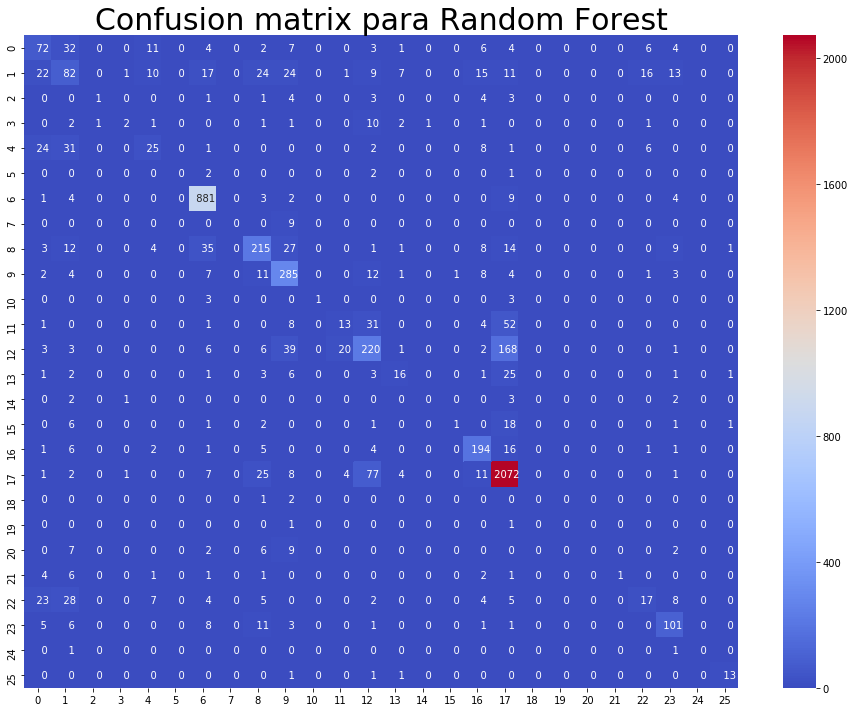

In [110]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
frst_cm = confusion_matrix(y_test, prediction)
fig = plt.figure(figsize = (16,12))
sns.heatmap(frst_cm,annot=True,fmt='5.0f',cmap="coolwarm")
plt.title('Confusion matrix para Random Forest', y=2.05, size=30)

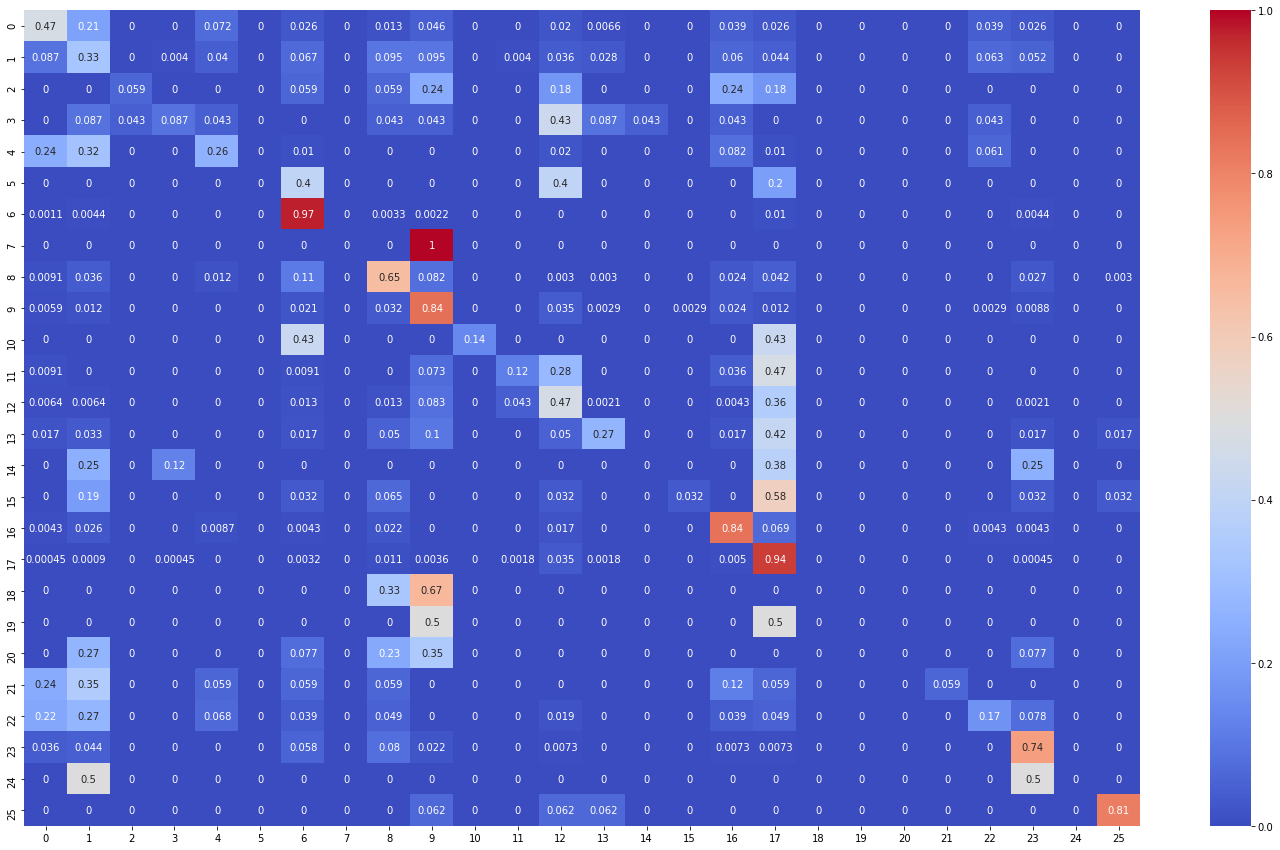

In [111]:
conf_mat = confusion_matrix(y_test, prediction, labels=np.sort(y_test.unique()))
conf_mat_df = pd.DataFrame(
    conf_mat)
conf_mat_props = pd.DataFrame(
    conf_mat_df.values / conf_mat_df.sum(axis=1)[:,None])
fig = plt.figure(figsize = (25,15))

sns.heatmap(conf_mat_props, annot=True, cmap= 'coolwarm');